**Tutaj została rozpoczęta ciężka praca nad projektem "Analiza awarii w Stanach Zjednoczonych w latach 2010 - 2022". No to lećmy!**

Dla odniesienia: <br>
Incident (ang.), skrót `inc` - kiedy jakiś majątek zosatał zepsuty lub zniszczony, ale nie doszło do kontuzji. <br>
Accident (ang.), skrót `acc` - kiedy ktoś został kontuźny (być może wraz z majątkiem). <br>
skrót `lng` - iquefied natural gas <br>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [54]:
def g_drive_url_to_pandas_url(url: str):
    return 'https://drive.google.com/uc?id=' + url.split('/')[-2]

In [111]:
def load_data():
    acc_hazardous_liquid_ds = {}
    inc_gas_distribution_ds = {}
    inc_gas_trans_gathering_ds = {}
    inc_lng_ds = {}
    if not os.path.exists('./data'):
        os.makedir('./data')
    if os.path.isfile('data/accident_hazardous_liquid_jan2010_present.csv'):
        acc_hazardous_liquid_ds = pd.read_csv('./data/accident_hazardous_liquid_jan2010_present.csv')
    else:
        acc_hazardous_liquid_ds = pd.read_csv(g_drive_url_to_pandas_url('https://drive.google.com/file/d/1zgxgKvsxkzMriVOrzpfda5qWEAQVU6VR/view?usp=sharing'))
        acc_hazardous_liquid_ds.to_csv('data/accident_hazardous_liquid_jan2010_present.csv')
    if os.path.isfile('data/incident_gas_distribution_jan2010_present.csv'):
        inc_gas_distribution_ds = pd.read_csv('./data/incident_gas_distribution_jan2010_present.csv')
    else:
        inc_gas_distribution_ds = pd.read_csv(g_drive_url_to_pandas_url('https://drive.google.com/file/d/1CiCFVidepkOss0vVbwXOXHkCSzfdmFGY/view?usp=sharing'))
        inc_gas_distribution_ds.to_csv('data/incident_gas_distribution_jan2010_present.csv')
    
    if os.path.isfile('data/incident_gas_transmission_gathering_jan2010_present.csv'):
        inc_gas_trans_gathering_ds = pd.read_csv('./data/incident_gas_transmission_gathering_jan2010_present.csv')
    else:
        inc_gas_trans_gathering_ds = pd.read_csv(g_drive_url_to_pandas_url('https://drive.google.com/file/d/1y-RJcdkH2S74_r0he9WIVjcaOyLsQ6CA/view?usp=sharing'))
        inc_gas_trans_gathering_ds.to_csv('data/incident_gas_transmission_gathering_jan2010_present.csv')

    if os.path.isfile('data/incident_liquefied_natural_gas_jan2011_present.csv'):
        inc_lng_ds = pd.read_csv('data/incident_liquefied_natural_gas_jan2011_present.csv')
    else:
        inc_lng_ds = pd.read_csv(g_drive_url_to_pandas_url('https://drive.google.com/file/d/1dvgkQNSbVAp7Q3DjAPeMgkasnx-OXboV/view?usp=sharing'))
        inc_lng_ds.to_csv('data/incident_liquefied_natural_gas_jan2011_present.csv')
    return {'acc_hazardous_liquid_ds': acc_hazardous_liquid_ds, 'inc_gas_distribution_ds': inc_gas_distribution_ds, 
            'inc_gas_trans_gathering_ds': inc_gas_trans_gathering_ds, 'inc_lng_ds': inc_lng_ds}

In [112]:
all_data = load_data()
acc_hazardous_liquid_ds = all_data['acc_hazardous_liquid_ds']
inc_gas_distribution_ds = all_data['inc_gas_distribution_ds']
inc_gas_trans_gathering_ds = all_data['inc_gas_trans_gathering_ds']
inc_lng_ds = all_data['inc_lng_ds']

/var/folders/cn/mhwmm18103sbb1kd17kd3zrw0000gn/T/ipykernel_5308/1380347764.py:9: DtypeWarning: Columns (13,14,45,51,52,53,55,58,60,61,62,65,66,67,69,70,71,73,74,75,76,77,92,94,95,96,97,98,99,103,105,106,108,109,110,111,112,114,119,121,122,129,132,135,136,137,138,139,141,144,146,147,148,149,150,151,160,162,164,167,176,196,197,198,227,228,229,230,231,236,242,246,247,248,249,271,273,287,289,290,295,296,303,308,312,313,317,328,329,339,343,344,351,352,354,355,357,358,360,361,366,368,369,370,371,372,378,379,380,387,390,394,395,396,399,405,408,409,411,415,416,421,425,432,433,434,437,438,439,441,445,446,447,451,452,453,461,464,467,469,470,471,477,494,505,506,507,508,509,511,512,513,514,517,518,521,522,525,526,528,529,531,532,534,537,538,540,542,543,545,556,558,559,566,568,569,583,585,586,587,588,589,590,591,592,593,594,595,597,602,605,607,608,611,612,613,614,615,616,620,621,622,623,624,625,626,627,629,630,631,632,633,634,641,642,643) have mixed types. Specify dtype option on import or set low_

In [95]:
acc_hazardous_liquid_ds

,Unnamed: 0,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,...,PREPARER_FAX,PREPARED_DATE,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TELEPHONE,AUTHORIZER_TITLE,AUTHORIZER_EMAIL,NARRATIVE
0,1,2/27/2024,2024,20240054,39258,ORIGINAL,22830,WOLVERINE PIPELINE CO,"8075 CREEKSIDE DR., STE. 210",PORTAGE,...,NaN,2/27/2024,NaN,NaN,NaN,CHRIS NEELY,269-491-0411,VICE PRESIDENT AND MANAGER,chris_neely@wplco.com,"ON THURSDAY, FEBRUARY 2ND , 2024, A PUBLIC CIT..."
1,2,2/14/2024,2024,20240039,39190,ORIGINAL FINAL,39149,IMTT-BAYONNE,400 POYDRAS STREET SUITE 3000,NEW ORLEANS,...,NaN,2/7/2024,ROB MIECZKOWSKI,robertmieczkowski@imtt.com,2018235334,RICHARD AMBROSIO,2018235305,DIRECTOR OF OPERATIONS,richambrosio@imtt.com,"ON THE MORNING OF JANUARY 31, 2024 AN ODOR OF ..."
2,3,2/28/2024,2024,20240055,39263,ORIGINAL,32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",2828 N. HARWOOD SUITE 1300,DALLAS,...,NaN,2/28/2024,NaN,NaN,NaN,BRIDGETTE TAYLOR,2149546652,PIPELINE REGULATORY MANAGER,bridgette.taylor@hfsinclair.com,"ON JANUARY 29, 2024 AT APPX. 10:00 AM CENTRAL,..."
3,4,2/26/2024,2024,20240053,39253,ORIGINAL FINAL,31684,PHILLIPS 66 PIPELINE LLC,2331 CITYWEST BLVD,HOUSTON,...,NaN,2/26/2024,MICHAEL BLACKSMITH,michael.j.blacksmith@p66.com,7134122371,MICHAEL BLACKSMITH,7134122371,DIRECTOR OF DOT OPERATIONS AND COMPLIANCE,michael.j.blacksmith@p66.com,"AT APPROXIMATELY 05:45 AM, THE LOCAL ONSITE OP..."
4,5,2/23/2024,2024,20240052,39250,ORIGINAL FINAL,22610,"MAGELLAN PIPELINE COMPANY, LP","ONE WILLIAMS CENTER, MD OTC-9 P.O. BOX 22186, ...",TULSA,...,NaN,2/23/2024,NaN,NaN,NaN,TAYLOR KING,9185747191,SUPV. INTEGRITY MGMT AND REGULATORY COMPLIANCE,taylor.king@oneok.com,"AT 13:53 ON JANUARY 26TH, 2024 OPERATIONS PERS..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,5298,4/8/2010,2010,20100030,16276,SUPPLEMENTAL FINAL,300,"PLAINS PIPELINE, L.P.",333 CLAY STREET,HOUSTON,...,713-646-4310,12/15/2011,NaN,NaN,NaN,JORDAN JANAK,713-993-5162,SR DIR ENVIR AND RC,jrjanak@paalp.com,"ON JANUARY 7, 2010 AT APPROXIMATELY 1300 HOURS..."
5298,5299,2/12/2010,2010,20100260,18574,SUPPLEMENTAL FINAL,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",119 N 25TH STREET EAST,SUPERIOR,...,218-464-5992,9/16/2013,NaN,NaN,NaN,DAVID STAFFORD,218-464-5751,MANAGER US PIPELINE COMPLIANCE,david.stafford@enbridge.com,"ON JANUARY 6, 2010 AT APPROXIMATELY 19:30 LOCA..."
5299,5300,4/12/2010,2010,20100038,17747,SUPPLEMENTAL FINAL,20160,"PETROLOGISTICS OLEFINS, LLC",TWO HOUSTON CENTER,HOUSTON,...,2252820399,4/3/2013,NaN,NaN,NaN,PATRICK BARDWELL,2257067683,SYSTEM INTEGRITY MANAGER,pat.bardwall@bwpmlp.com,ON TUESDAY JANUARY 5 2010 AT 10:30 AM WHILE FL...
5300,5301,1/21/2010,2010,20100254,17331,SUPPLEMENTAL,15786,PORTLAND PIPELINE CORP,30 HILL STREET,SOUTH PORTLAND,...,207-767-0455,3/4/2013,NaN,NaN,NaN,KENNETH P. BROWN,207-767-0449,ENGINEERING MANAGER,ken.brown@pmpl.com,APPROXIMATELY 5 GALLONS OF CRUDE OIL OVERFLOWE...


Oto jest wykres funkcji gęstości prawdopodobieństwa każdej cechy od NaN/wszystkich postaci w kolumnie

[]

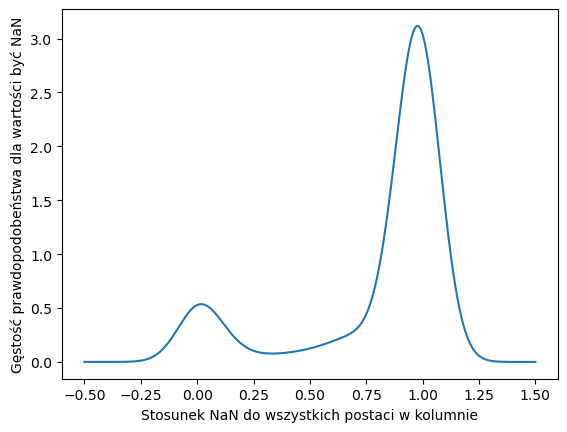

In [124]:
nan_to_all_data_ratios_2 = inc_gas_trans_gathering_ds.isna().apply(lambda row: row.sum()/row.size, axis=0).plot.density()
nan_to_all_data_ratios_2.set_xlabel('Stosunek NaN do wszystkich postaci w kolumnie')
nan_to_all_data_ratios_2.set_ylabel('Gęstość prawdopodobeństwa dla wartości być NaN')
nan_to_all_data_ratios_2.plot()

In [136]:
valuable_columns = acc_hazardous_liquid_ds.isna().apply(lambda row: row.sum()/row.size, axis=0).nsmallest(55).index[1:]

In [138]:
acc_hazardous_liquid_ds[valuable_columns]

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_POSTAL_CODE,...,AUTHORIZER_EMAIL,OPERATOR_STATE_ABBREVIATION,EST_COST_OTHER,NARRATIVE,ONSHORE_STATE_ABBREVIATION,ONSHORE_POSTAL_CODE,FEDERAL,LOCATION_TYPE,INCIDENT_AREA_TYPE,PREPARER_EMAIL
0,2/27/2024,2024,20240054,39258,ORIGINAL,22830,WOLVERINE PIPELINE CO,"8075 CREEKSIDE DR., STE. 210",PORTAGE,49024-6303,...,chris_neely@wplco.com,MI,30000.0,"ON THURSDAY, FEBRUARY 2ND , 2024, A PUBLIC CIT...",IN,46321,NO,PIPELINE RIGHT-OF-WAY,UNDERGROUND,spencer_welling@wplco.com
1,2/14/2024,2024,20240039,39190,ORIGINAL FINAL,39149,IMTT-BAYONNE,400 POYDRAS STREET SUITE 3000,NEW ORLEANS,70130,...,richambrosio@imtt.com,LA,0.0,"ON THE MORNING OF JANUARY 31, 2024 AN ODOR OF ...",NJ,7002,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,"TANK, INCLUDING ATTACHED APPURTENANCES",willsimmons@imtt.com
2,2/28/2024,2024,20240055,39263,ORIGINAL,32011,"HOLLY ENERGY PARTNERS - OPERATING, L.P.",2828 N. HARWOOD SUITE 1300,DALLAS,75201,...,bridgette.taylor@hfsinclair.com,TX,0.0,"ON JANUARY 29, 2024 AT APPX. 10:00 AM CENTRAL,...",TX,79603,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,ABOVEGROUND,bridgette.taylor@hfsinclair.com
3,2/26/2024,2024,20240053,39253,ORIGINAL FINAL,31684,PHILLIPS 66 PIPELINE LLC,2331 CITYWEST BLVD,HOUSTON,77042,...,michael.j.blacksmith@p66.com,TX,0.0,"AT APPROXIMATELY 05:45 AM, THE LOCAL ONSITE OP...",LA,70665,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,ABOVEGROUND,michael.j.blacksmith@p66.com
4,2/23/2024,2024,20240052,39250,ORIGINAL FINAL,22610,"MAGELLAN PIPELINE COMPANY, LP","ONE WILLIAMS CENTER, MD OTC-9 P.O. BOX 22186, ...",TULSA,74172,...,taylor.king@oneok.com,OK,0.0,"AT 13:53 ON JANUARY 26TH, 2024 OPERATIONS PERS...",MN,56201,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,ABOVEGROUND,caroline.ratliff@oneok.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297,4/8/2010,2010,20100030,16276,SUPPLEMENTAL FINAL,300,"PLAINS PIPELINE, L.P.",333 CLAY STREET,HOUSTON,772104648,...,jrjanak@paalp.com,TX,0.0,"ON JANUARY 7, 2010 AT APPROXIMATELY 1300 HOURS...",TX,75090,NO,PIPELINE RIGHT-OF-WAY,UNDERGROUND,ce.gcschutza@paalp.com
5298,2/12/2010,2010,20100260,18574,SUPPLEMENTAL FINAL,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",119 N 25TH STREET EAST,SUPERIOR,54880,...,david.stafford@enbridge.com,WI,0.0,"ON JANUARY 6, 2010 AT APPROXIMATELY 19:30 LOCA...",WI,54880-5247,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,UNDERGROUND,stacy.soine@enbridge.com
5299,4/12/2010,2010,20100038,17747,SUPPLEMENTAL FINAL,20160,"PETROLOGISTICS OLEFINS, LLC",TWO HOUSTON CENTER,HOUSTON,77010,...,pat.bardwall@bwpmlp.com,TX,0.0,ON TUESDAY JANUARY 5 2010 AT 10:30 AM WHILE FL...,LA,70665,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,ABOVEGROUND,sueanne.alexander@bwpmlp.com
5300,1/21/2010,2010,20100254,17331,SUPPLEMENTAL,15786,PORTLAND PIPELINE CORP,30 HILL STREET,SOUTH PORTLAND,4116,...,ken.brown@pmpl.com,ME,0.0,APPROXIMATELY 5 GALLONS OF CRUDE OIL OVERFLOWE...,ME,4071,NO,TOTALLY CONTAINED ON OPERATOR-CONTROLLED PROPERTY,ABOVEGROUND,ken.brown@pmpl.com


In [3]:
ivans_df_raw = pd.read_csv('data/df_872_cols/df_awarie_2010-2022_p1_ivan.csv')

/var/folders/cn/mhwmm18103sbb1kd17kd3zrw0000gn/T/ipykernel_87260/2318110756.py:1: DtypeWarning: Columns (19,49,51,52,53,56,57,58,59,67,68,82,84,89,95,97,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,138,143,151,152,153,155,156,157,159,160,161,162,171,172,173,176,177,185,188,191,192,193,194,195,197,202,203,204,205,206,207,208,209,210,216,218,220,235,236,237,238,239,240,241,242,243,244,245,249,251,252,257,263,279,280,281,282,283,292) have mixed types. Specify dtype option on import or set low_memory=False.
  ivans_df_raw = pd.read_csv('data/df_872_cols/df_awarie_2010-2022_p1_ivan.csv')


In [62]:
ivans_df_raw['EXTRNL_COR_MICROBIOLOGIC_IND']

KeyError: 'EXTRNL_COR_MICROBIOLOGIC_IND'

In [58]:
ivans_df_raw.loc[:, ivans_df_raw.isna().apply(lambda row: row.sum()/row.size, axis=0) < 0.2]

,id,data_source,REPORT_NUMBER,REPORT_RECEIVED_DATE,IYEAR,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,...,PIPE_FACILITY_TYPE,INSTALLATION_YEAR,RELEASE_TYPE,COULD_BE_HCA,ACCIDENT_PSIG,MOP_PSIG,ACCIDENT_PRESSURE,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,INVESTIGATION_STATUS
0,0,accident_gravity_reporting_regulated_jul2020_p...,20230010,1/30/2023,2022,39033,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,accident_gravity_reporting_regulated_jul2020_p...,20230006,1/24/2023,2022,37618,ORIGINAL FINAL,31888,CENTURION PIPELINE L.P.,1300 MAIN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,accident_gravity_reporting_regulated_jul2020_p...,20230008,1/25/2023,2022,37797,SUPPLEMENTAL FINAL,15851,"DELEK MARKETING AND SUPPLY, LP",12700 PARK CENTRAL DRIVE SUITE 700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,accident_gravity_reporting_regulated_jul2020_p...,20230005,1/17/2023,2022,38456,SUPPLEMENTAL FINAL,22465,TARGA PIPELINE MID-CONTINENT WESTTEX LLC,"811 LOUISIANA STREET, SUITE 2100",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,accident_gravity_reporting_regulated_jul2020_p...,20230004,1/17/2023,2022,37584,ORIGINAL FINAL,39649,"IRONWOOD MIDSTREAM ENERGY PARTNERS, LLC","15727 ANTHEM PARKWAY, SUITE 510",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,8181,incident_type_r_reporting_regulated_gas_gather...,20220005,9/15/2022,2022,37114,ORIGINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,...,INTRASTATE,2017,OTHER,NaN,45.0,50.0,NaN,NaN,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
8182,8182,incident_type_r_reporting_regulated_gas_gather...,20220004,8/26/2022,2022,37575,SUPPLEMENTAL FINAL,30711,HILCORP ENERGY COMPANY,1111 TRAVIS,...,INTRASTATE,2015,LEAK,NaN,170.0,500.0,NaN,NaN,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
8183,8183,incident_type_r_reporting_regulated_gas_gather...,20220003,7/1/2022,2022,37177,SUPPLEMENTAL FINAL,31130,DCP MIDSTREAM,2331 CITYWEST BLVD. HQ-08-S812-02,...,INTRASTATE,1999,RUPTURE,NaN,442.0,NaN,NaN,NaN,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
8184,8184,incident_type_r_reporting_regulated_gas_gather...,20220002,6/23/2022,2022,37586,SUPPLEMENTAL FINAL,31618,ENTERPRISE PRODUCTS OPERATING LLC,1100 LOUISIANA STREET,...,INTRASTATE,2017,OTHER,NaN,45.0,50.0,NaN,NaN,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."


In [31]:
ivans_df_nan_filtered=ivans_df_raw.loc[:, ivans_df_raw.isna().apply(lambda row: row.sum()/row.size, axis=0) < 0.2]

In [33]:
ivans_df_nan_filtered.isna().apply(lambda row: row.sum()/row.size, axis=0).sort_values(ascending=True)

id                              0.000000
CAUSE                           0.000000
PRPTY                           0.000000
IGNITE_IND                      0.000000
CAUSE_DETAILS                   0.000000
INJURY_IND                      0.000000
FATAL                           0.000000
FATALITY_IND                    0.000000
LOCAL_DATETIME                  0.000000
OPERATOR_POSTAL_CODE            0.000000
INJURE                          0.000000
REPORT_RECEIVED_DATE            0.000000
data_source                     0.000000
REPORT_NUMBER                   0.000000
OPERATOR_CITY_NAME              0.000000
IYEAR                           0.000000
SUPPLEMENTAL_NUMBER             0.000000
REPORT_TYPE                     0.000000
PREPARER_NAME                   0.000000
OPERATOR_STREET_ADDRESS         0.000000
NAME                            0.000000
OPERATOR_ID                     0.000000
OPERATOR_STATE_ABBREVIATION     0.001588
EST_COST_EMERGENCY              0.001588
EST_COST_PROP_DA

In [53]:
ivans_df_nan_filtered.to_csv('ivan_intermediate.csv')

In [46]:
ivans_df_nan_filtered.loc[ivans_df_nan_filtered['NAME'] == 'DELEK LOGISTICS OPERATING, LLC.']

,id,data_source,REPORT_NUMBER,REPORT_RECEIVED_DATE,IYEAR,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,...,PIPE_FACILITY_TYPE,INSTALLATION_YEAR,RELEASE_TYPE,COULD_BE_HCA,ACCIDENT_PSIG,MOP_PSIG,ACCIDENT_PRESSURE,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,INVESTIGATION_STATUS
0,0,accident_gravity_reporting_regulated_jul2020_p...,20230010,1/30/2023,2022,39033,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,1006,accident_hazardous_liquid_jan2010_present,20200198,7/7/2020,2020,35364,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTRASTATE,2015,LEAK,NO,8.0,13.0,PRESSURE DID NOT EXCEED MOP,< 20% SMYS REGULATED TRANSMISSION,YES,"YES, BUT THE INVESTIGATION OF THE CONTROL ROOM..."
1164,1164,accident_hazardous_liquid_jan2010_present,20200032,2/3/2020,2020,33437,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTRASTATE,1960,LEAK,NO,150.0,400.0,PRESSURE DID NOT EXCEED MOP,< 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
1190,1190,accident_hazardous_liquid_jan2010_present,20200007,1/8/2020,2019,35745,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTRASTATE,UNKNOWN,LEAK,YES,1.0,275.0,PRESSURE DID NOT EXCEED MOP,< 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
1413,1413,accident_hazardous_liquid_jan2010_present,20200015,1/22/2020,2019,33810,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,OVERFILL OR OVERFLOW,NO,80.0,275.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
1681,1681,accident_hazardous_liquid_jan2010_present,20180282,9/24/2018,2018,32217,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,NO,9.0,200.0,PRESSURE DID NOT EXCEED MOP,=< 20% SMYS REGULATED GATHERING,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
1696,1696,accident_hazardous_liquid_jan2010_present,20180281,9/19/2018,2018,32541,SUPPLEMENTAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,YES,100.0,408.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
2522,2522,accident_hazardous_liquid_jan2010_present,20160303,9/16/2016,2016,33552,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,NO,40.0,285.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
2766,2766,accident_hazardous_liquid_jan2010_present,20160098,3/30/2016,2016,21887,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTRASTATE,1930,LEAK,NO,400.0,860.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
3534,3534,accident_hazardous_liquid_jan2010_present,20140202,5/23/2014,2014,20024,SUPPLEMENTAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,1990,LEAK,NO,50.0,720.0,PRESSURE DID NOT EXCEED MOP,=< 20% SMYS REGULATED GATHERING,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."


In [52]:
ivans_df_nan_filtered.loc[(ivans_df_nan_filtered['NAME'] == 'DELEK LOGISTICS OPERATING, LLC.') & (ivans_df_nan_filtered['PIPE_FACILITY_TYPE'] != 'INTRASTATE')]

,id,data_source,REPORT_NUMBER,REPORT_RECEIVED_DATE,IYEAR,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,...,PIPE_FACILITY_TYPE,INSTALLATION_YEAR,RELEASE_TYPE,COULD_BE_HCA,ACCIDENT_PSIG,MOP_PSIG,ACCIDENT_PRESSURE,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,INVESTIGATION_STATUS
0,0,accident_gravity_reporting_regulated_jul2020_p...,20230010,1/30/2023,2022,39033,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,1413,accident_hazardous_liquid_jan2010_present,20200015,1/22/2020,2019,33810,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,OVERFILL OR OVERFLOW,NO,80.0,275.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
1681,1681,accident_hazardous_liquid_jan2010_present,20180282,9/24/2018,2018,32217,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,NO,9.0,200.0,PRESSURE DID NOT EXCEED MOP,=< 20% SMYS REGULATED GATHERING,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
1696,1696,accident_hazardous_liquid_jan2010_present,20180281,9/19/2018,2018,32541,SUPPLEMENTAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,YES,100.0,408.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
2522,2522,accident_hazardous_liquid_jan2010_present,20160303,9/16/2016,2016,33552,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,UNKNOWN,LEAK,NO,40.0,285.0,PRESSURE DID NOT EXCEED MOP,> 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."
3534,3534,accident_hazardous_liquid_jan2010_present,20140202,5/23/2014,2014,20024,SUPPLEMENTAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,1990,LEAK,NO,50.0,720.0,PRESSURE DID NOT EXCEED MOP,=< 20% SMYS REGULATED GATHERING,NO,"NO, THE FACILITY WAS NOT MONITORED BY A CONTRO..."
4089,4089,accident_hazardous_liquid_jan2010_present,20140097,3/14/2014,2013,19876,SUPPLEMENTAL FINAL,11551,"DELEK LOGISTICS OPERATING, LLC.",12700 PARK CENTRAL DRIVE SUITE 700,...,INTERSTATE,1940,OTHER,NO,35.0,285.0,PRESSURE DID NOT EXCEED MOP,< 20% SMYS REGULATED TRANSMISSION,YES,"NO, THE OPERATOR DID NOT FIND THAT AN INVESTIG..."


In [51]:
ivans_df_nan_filtered['INVESTIGATION_STATUS'].iloc[8181]

'NO, THE FACILITY WAS NOT MONITORED BY A CONTROLLER(S) AT THE TIME OF THE INCIDENT'

Wyrzucamy kolumny:
 - REPORT_NUMBER - numer raportu, w żaden sposób nie związany z danymi
 - IYEAR - kopia REPORT_RECEIVED_DATE
 - SUPPLEMENTAL_NUMBER - numer załączniku do raportu, w żaden sposób nie związany z danymi
 - REPORT_TYPE - nie będziemy mogli udzielić ten typ danych jako wejście, bo nie będziemy mieli taki raport
 - NAME - kopja OPERATOR_ID
 - OPERATOR_STREET_ADDRESS - kopja OPERATOR_ID
 - OPERATOR_STATE_ABBREVIATION - kopja OPERATOR_ID
 - OPERATOR_POSTAL_CODE - kopja OPERATOR_ID
 - FATALITY_IND - YES jeśli FATAL > 0, NO inaczej
 - INJURY_IND - YES jeśli INJURE > 0, NO inaczej
 - NRC_RPT_NUM - id wniosku National Response Center
 - PRPTY - całkowity koszt, wszystkie go składniki są w danych, można wyrzuić
 - PREPARER_NAME - nie ma żadnego wpływu na dane
 - PREPARER_TITLE - nie ma żadnego wpływu na dane
 - PREPARER_EMAIL - nie ma żadnego wpływu na dane
 - PREPARER_TELEPHONE - nie ma żadnego wpływu na dane